# Trabajo Práctico 1 - Algebra Lineal Compuacional

In [3]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt #biblioteca para graficar

## Descomposición $LU$

#### Ejercicio 1 - descompLU
 El objetivo de este ejercicio es hallar la descomposición LU de una matriz cuadrada sin pivoteos.

 La funcion recibe una matriz $ A \in \mathbb{K}^{n \times n} $ y devuelve dos matrices $L$ y $U$ $\in \mathbb{K}^{n \times n} $.

La función realiza este proceso de manera recursiva, llamando a una funcion auxiliar descompLUaux a la que le pasamos como parámetros a la matriz $A$ y un valor booleano. Esta función nos devolverá las matrices $L$ y $U$ y un valor booleano, que nos indicará si hubo un error en la diagonalización.

La función descompLUaux separa en bloques a nuestra matriz $A$ de la siguiente manera:

\begin{equation}
 A = LU
\end{equation}
\begin{equation}
  \begin{pmatrix}
    a_{11} & A_{12} \\
    A_{21} & A_{22}
  \end{pmatrix} =
  \begin{pmatrix}
    1  & 0 \\
    L_{21} & L_{22}
  \end{pmatrix}
  \begin{pmatrix}
    u_{11}  & U_{12} \\
    0 & U_{22}
  \end{pmatrix}  
\end{equation}


De la igualdad anterior podemos obtener las siguientes ecuaciones:
  \begin{equation}
    u_{11} = a_{11}
  \end{equation}
  \begin{equation}
    U_{12} = A_{12}
  \end{equation}
  \begin{equation}
    L_{21} = \frac{A_{21}}{u_{11}}
  \end{equation}
  \begin{equation}
    A_{22} − L_{21}U_{12} = L_{22}U_{22}
  \end{equation}

Nuestra función descompLUaux va a ir calculando los $u_{11}$,  $U_{12}$  y $L_{21}$ y luego va a hacer un llamado recursivo tomando como parametro la matriz cuadrada $L_{22}U_{22}$ y el valor booleano que le ingresamos al principio hasta que la dimensión de $L_{22}U_{22}$ sea 1.

 En Caso de encontrar un 0 en la diagonal en el proceso recursivo. la función descompLUaux va a devolver un mensaje de error y va a cambiar el valor booleano que le ingresamos como parametro a False.

 Por último la función descompLU chequea que el booleano sea False, en caso de que si, devuelve las matrices $I_n$ y $A$ original. En caso de que el booleano sea True, devuelve las matrices $L$ y $U$ obtenidas por la función descompLUaux.

In [4]:
def descompLU(A):
  L, U, b = descompLUaux(A,True) #Llamado a la función auxiliar
  if b == False:
    return np.eye(A.shape[0],A.shape[0]) , A #En caso de un 0 en la diagonal devolvemos la Identidad y la matriz A
  else:
    return L, U

def descompLUaux(A,b):
    n = A.shape[0]
    if A[0][0] == 0:
        print('Error, 0 en la diagonal')
        return np.eye(n,n), A, False #Cambiamos el valor del booleano
    else:
        if n == 1: #Caso Base
            return np.array([[1]]), A.copy(), b
        U = np.zeros((n,n))
        L = np.eye(n,n)

        U[0][0] = A[0][0] #Obtiene U11

        for i in range(1,n):
              L[i][0] = A[i][0] * 1/(A[0][0]) #Obtiene L21
              U[0][i] = A[0][i] #Obtiene U12

        B = A[1:, 1:] - L[1:n, :1] @ U[:1, 1:n] #Calcula L22*U22

        L[1:, 1:], U[1:, 1:], b = descompLUaux(B,b) #Llamado recursivo

        return L, U, b

#### Ejercicio 2 - descomposicion LU con pivoteo parcial (opcional)
La función *descompPLU* recibe una matriz A ∈ $\mathbb{R}^{n×n}$
y retorna las matrices $P$, $L$ y $U$ de la descomposición $PA = LU$.

In [5]:
#ingresa una matriz (igual que en el ej 1)
def descompPLU(A):
  n = A.shape[0]
  P = np.zeros((n,n))
  #se fija cual es el mayor numero de cada columna, y pone un 1 en su lugar en una matriz de 0s, P
  for j in range(n):
    m = 0
    for i in range(n):
      P
      b = True
      for k in range(0,j): #acá nos fijamos si ya hay otro 1 en la misma fila en la matriz P
        if P[i][k] == 1:
          b = False
      if b == True and (i == 0 or A[i][j] > A[m][j]): #si no hay otro 1 en las columnas anteriores de la fila de un elemento, y el elemento es el mayor de su columna, ponemos un 1 en su posicion en la matriz P
        P[m][j] = 0
        m = i
        P[m][j] = 1
      if b == False and i == m: # por último, si ya había otro 1 en una columna anterior, movemos el "máximo" de lugar
        P[m][j] = 0
        m += 1
        P[m][j] = 1
  # la matriz resultante P, es una matriz de cambio de filas, para ordenar las filas de la matriz ingresada A, y que no aparezcan 0 en la diagonal
  return P, descompLU(P@A) #devuelve la matriz de cambio de filas y la descomposicion LU de A con las filas cambiadas

In [6]:
A = np.array([[4,2,3],[2,1,-4],[3,2,1]])

print(descompPLU(A))
print('*')
print("*")
print(scipy.linalg.lu(A))

(array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]]), (array([[1.  , 0.  , 0.  ],
       [0.75, 1.  , 0.  ],
       [0.5 , 0.  , 1.  ]]), array([[ 4.  ,  2.  ,  3.  ],
       [ 0.  ,  0.5 , -1.25],
       [ 0.  ,  0.  , -5.5 ]])))
*
*
(array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]]), array([[1.  , 0.  , 0.  ],
       [0.75, 1.  , 0.  ],
       [0.5 , 0.  , 1.  ]]), array([[ 4.  ,  2.  ,  3.  ],
       [ 0.  ,  0.5 , -1.25],
       [ 0.  ,  0.  , -5.5 ]]))


Podemos observar que las descomposicion PLU funciona correctamente

#### Ejercicio 3 - resolverLU
La siguiente función resolverLU recibe una matriz $A$ cuadrada de tamaño
$n×n$ y un vector $b$ de tamaño $n$ y devuelve la solución $x$ del sistema $Ax = b$ calculando primero
la descomposición LU y resolviendo luego los sistemas $Ly = b$ y $Ux = y$.

In [7]:
def resolverLU(A, b):
    L, U = descompLU(A) #Calcula la descomposición LU
    y = scipy.linalg.solve_triangular(L,b,unit_diagonal= True, lower = True) #Ly = b
    x = scipy.linalg.solve_triangular(U,y) #Ux = y
    return x

#### Ejercicio 4
Nos interesa calcular el error relativo en norma-2 para un sistema $Ax=b$ con una matriz $A ∈ \mathbb{R}^{10×10}$ compuesta por números aleatorios en [−1, 1) y un vector $b ∈ \mathbb{R}^{10}$ también de números aleatorios en [−1, 1).

Para eso vamos a utilizar el comando $np.random.uniform$

In [8]:
A = np.random.uniform(-1,1,(10,10)) #matriz 10x10
b = np.random.uniform(-1,1,(10,1)) #vector 1x10
print("A: \n",A,"\n b: \n",b)

A: 
 [[-0.58806708 -0.63714275 -0.21053388 -0.55939792  0.99985359 -0.55341079
   0.48507751  0.0446755  -0.65993907  0.89965217]
 [ 0.49344394  0.19391664 -0.07222305  0.08508481  0.45808415  0.23433907
  -0.91281563  0.59115151  0.27578021 -0.56706694]
 [-0.55029852  0.59765152  0.72503062  0.01013395 -0.06506193 -0.54779826
   0.56274738  0.19842152  0.26816801 -0.21749912]
 [-0.48710938 -0.98845992 -0.09881503  0.08024827  0.90474056 -0.84549731
  -0.12068357 -0.79224169  0.56191001 -0.48206081]
 [ 0.64144865 -0.46967109  0.00865235  0.60574462  0.76857996  0.53709334
   0.99084089  0.51608902 -0.39474015 -0.88583647]
 [-0.81544132 -0.52875101 -0.46143017  0.98592787 -0.93413571 -0.92856269
  -0.79759884 -0.85899177 -0.96824376 -0.41285793]
 [-0.68867193 -0.96209894  0.04764941 -0.35426829 -0.9829875   0.31455257
  -0.13470699 -0.45858452  0.14983627  0.04544754]
 [-0.78734115  0.67046987  0.23232724  0.45020779 -0.43727348 -0.86908581
  -0.87932712  0.61328231  0.06223854  0.33952

Luego, obtenemos la solución del sistema $Ax=b$ llamando a nuestra función resolverLU y calculamos el error relativo en norma-2 utilizando la función e_relativo que toma a nuestra matriz $A$ y vector $b$ de números random obtenidas anteriormente junto con la solución $x$ que calculamos. Consecuentemente, devuelve el resultado de la siguiente cuenta:
\begin{equation}
res = \frac{|| Ax - b||}{||b||}
\end{equation}

In [9]:
x = resolverLU(A,b) #Solucion del sistema

def e_relativo(A,x,b):
    numerador = np.linalg.norm(A@x - b)
    denominador = np.linalg.norm(b)
    e_relativo = numerador/denominador
    return e_relativo

print("Error relativo: ", e_relativo(A,x,b))

Error relativo:  7.176528092251539e-13


## Calculo de la Inversa

#### Ejercicio 5 - inversa
la función inversa recibe una matriz $A$ de tamaño $n×n$ inversible
y calcula la inversa de A realizando los siguientes pasos:
1. Calcula la descomposición LU de A utilizando la función descompLU.
2. Para cada vector $e_i$, 1 ≤ i ≤ n, de la base canónica de $R^n$ resuelve los sistemas $L_y = e_i$ y $U_x = y$ mediante el comando $scipy.linalg.solve triangular$.
3. Guarda las soluciones como columnas de la matriz inversa.




In [10]:
def inversa(A):
  n = A.shape[0]
  I = np.eye(n,n)
  L, U = descompLU(A) #Paso 1
  for i in range(n): #Paso 2
    canonico = np.arange(n)*0
    canonico[i] = 1
    Ly = scipy.linalg.solve_triangular(L,canonico,unit_diagonal= True, lower = True)
    I[i] = scipy.linalg.solve_triangular(U,Ly) #Paso 3. Primero guardamos las soluciones como filas y luego transponemos la matriz I.
  return I.transpose()


#### Ejercicio 6
A continuación probamos la función **inversa** implementada, tomando una matriz $A∈ R^{10×10}$ de números aleatorios en [−1, 1) y Calculando $A^{−1}A$ (siendo $A^{−1}$ la matriz retornada por la función inversa)

In [11]:
A = np.random.uniform(-1,1,(10,10)) #matriz 10x10

print(np.matmul(A,inversa(A))) #multiplicamos la matriz de 10x10 por su inversa

[[ 1.00000000e+00 -2.85442264e-17  6.53618915e-17  1.18208044e-16
  -1.00156192e-16  1.12306386e-16 -2.33364179e-17 -2.34468153e-17
  -7.94406621e-17  2.57839534e-17]
 [-4.45238192e-17  1.00000000e+00  4.76508539e-17  1.42411431e-17
  -2.06604216e-16  1.26632767e-16 -7.71119113e-17  1.70749792e-17
  -1.49318861e-16 -8.16474671e-17]
 [ 1.43573939e-16  1.73374661e-16  1.00000000e+00  3.98744443e-16
   1.53965122e-16  9.24763661e-17  5.96353635e-17 -5.63821339e-17
  -2.34940151e-16  5.16896332e-17]
 [ 1.09569140e-16 -3.26968912e-16 -1.02235084e-16  1.00000000e+00
  -1.51860525e-16 -5.20885049e-17  1.16162894e-16 -1.26778287e-17
   3.32322361e-17 -6.14537820e-17]
 [ 5.46402533e-17 -4.80378316e-16  2.28764025e-17 -4.05847582e-16
   1.00000000e+00 -2.78728356e-16 -3.45305560e-17  5.43773769e-17
  -2.51185703e-16  2.08035038e-16]
 [-4.04897363e-17 -9.03569865e-17 -3.38211028e-16 -2.83230769e-16
  -7.06470661e-17  1.00000000e+00  2.32623810e-16 -1.10979543e-16
   3.86960618e-17  8.36570230e-17

Observación:  No da 0's ni 1's exactos, pero da números muy cercanos. Podemos ver que es una "aproximación" de la matriz identidad

Luego calculamos el error relativo en norma frobenius de $A^{−1}A − I$ .

In [12]:
def e_relativoFrobenius(A):
    inv = inversa(A)
    I = np.eye(10)
    return np.linalg.norm((np.matmul(A,inversa(A))-I),ord='fro')

print("Error relativo en norma Frobenius: ", e_relativoFrobenius(A))

Error relativo en norma Frobenius:  4.192222563278235e-15


## Experimentos

#### Ejercicio 7
Para el siguiente experimento compararemos dos formas de obtener la solución a un sistema matricial $Ax=b$, donde $A$ es una matriz perteneciente a $\mathbb{R}^{n×n}$, mientras que $b$ y $x$ vectores random pertenecientes a $\mathbb{R}^n$. Inicializaremos a $A$ y a $x$ con números random en el intervalo $[-1,1)$ y definiremos $b = Ax$

Calcularemos la solución x del sistema a través de dos métodos:
 * Método 1: utilizando nuestra función **resolverLU(A,b)** planteada en el ejercicio 3
 * Método 2: calculando la inversa de la $A$ y multiplicarla por $b$.

La comparación entre los dos métodos la realizaremos calculando el logaritmo natural del error relativo que, a su vez, obtendremos utilizando nuestra función diseñada en el ejercicio 4.

In [13]:
#Funciones auxiliares
def calcular_x1(A, b):
  res = resolverLU(A, b)
  return res

def calcular_x2(A,b):
  res = inversa(A)@b
  return res

def ln_err_xi(A, b, xi, x):
  res = np.log(e_relativo(A,xi,b))
  return res

Nos interesa saber como se comporta el error relativo de ambos métodos a medida que el $n$ de nuestra matriz $A$ y $b$ aumenta. Para eso diseñamos la funcion *almacenar_error* que inicializa dos vectores $v1$ y $v2$ donde guardaremos la suma de errores relativos para 10 $A$, $b$ y $x$ distintos por cada dimensión $n$.

 La dimensión de $A$, $b$ y $x$ comenzará en 10 y terminará en 200.

In [14]:
def almacenar_error():
  v1 = np.array([])
  v2 = np.array([])
  n = 10
  while n <= 200:
      suma_errores_x1 = 0
      suma_errores_x2 = 0
      for j in range(10):
        A = np.random.uniform(-1,1,(n,n)) #matriz nxn
        x = np.random.uniform(-1,1,(n,1)) #vector 1xn, solución original.
        b = np.matmul(A, x)
        #Forma 1
        x1 = calcular_x1(A.copy(), b)
        ln_err_x1 = ln_err_xi(A.copy(),b,x1,x)
        suma_errores_x1 += ln_err_x1
        #Forma 2
        x2 = calcular_x2(A.copy(),b)
        ln_err_x2 = ln_err_xi(A.copy(),b,x2, x)
        suma_errores_x2 += ln_err_x2
      v1 = np.append(v1, suma_errores_x1)
      v2 = np.append(v2, suma_errores_x2)
      n+=1
  return v1, v2
v1, v2 = almacenar_error()

A continuación graficaremos la suma de los logaritmos naturales de los errores almacenada en $v1$ y $v2$ con respecto a la dimensión $n$

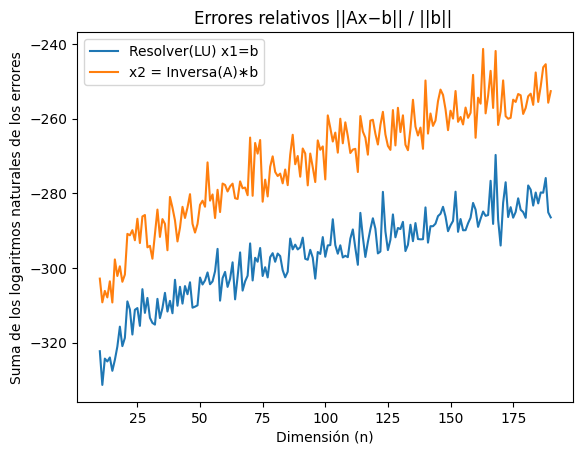

In [15]:
#Grafico:
n = np.arange(10, len(v1))
plt.plot(n, v1[10: ], label='Resolver(LU) x1=b')
plt.plot(n, v2[10: ], label= 'x2 = Inversa(A)∗b')
plt.title('Errores relativos ||Ax−b|| / ||b|| ' )
plt.legend()
plt.xlabel("Dimensión (n)")
plt.ylabel("Suma de los logaritmos naturales de los errores")
plt.show()

**Observaciones**

Al observar el gráfico podemos ver que el método que parece tener menor error es el método 1, que utiliza nuestra funcion *resolverLU(A,b)* ya que la suma de los logaritmos naturales es menor. Una posible explicación de porque pasa esto es que nuestro método 2 implica más operaciones computacionales que el método 1.

A su vez, también podemos observar que los errores tienden a aumentar a medida que aumenta la dimensión de nuestras matrices $A$ y vectores $x$ y $v$. A su vez, la diferencia de error entre los dos metodos también aumenta.

#### Ejercicio 8
Para este experimento repetiremos los procesos ejecutados en el ejercicio 7, pero variaremos la forma de calcular el error relativo. Utilizaremos la siguiente forma:

\begin{equation}
res = \frac{||x_i - x||}{||x||}
\end{equation}

Donde $x$ es la solución original de nuestro sistema $Ax=b$. Mientras que $x_i$ serán las soluciones obtenidas mediante los métodos descriptos anteriormente en el ejercicio 7.

In [16]:
#Funcion para calcular el nuevo error relativo ||xi - x|| / ||x||

def err_relativo2(xi, x):
    numerador = np.linalg.norm(xi-x)
    denominador = np.linalg.norm(x)
    res = numerador/denominador
    return res

#Cambiamos la forma de calcular el error relativo
def ln_err_xi(A, b, xi, x):
  res = np.log(err_relativo2(xi, x))
  return res

#Almacenamos los errores en v1 y v2
v1, v2 = almacenar_error()

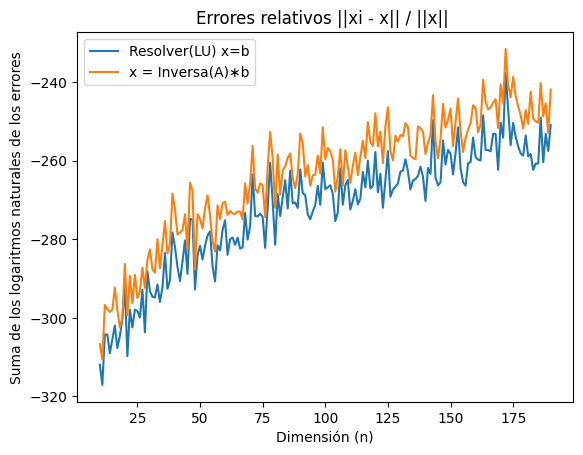

In [19]:
#Grafico
n = np.arange(10, len(v1))
plt.plot(n, v1[10: ], label='Resolver(LU) x=b')
plt.plot(n, v2[10: ], label= 'x = Inversa(A)∗b')
plt.title('Errores relativos ||xi - x|| / ||x|| ' )
plt.xlabel("Dimensión (n)")
plt.ylabel("Suma de los logaritmos naturales de los errores")
plt.legend()
plt.show()

**Observaciones**

Observando este gráfico podemos afirmar que el método 1 sigue siendo el más preciso, pero ahora hay una menor diferencia, ya que el error de ambos métodos tiende a crecer de manera parecida a medida que la dimensión aumenta.

#### Ejercicio 9
A continuación repetiremos los experimentos realizados en los ejercicios 7 y 8, pero cambiando la forma en la que obtenemos las soluciones $x_1$ y $x_2$.

Utilizaremos los comandos *np.linalg.solve(A,B)* y *np.linalg.inv(A)* en reemplazo de los métodos 1 y 2 respectivamente.

In [20]:
#Cambiamos la forma en la que obtenemos x1 y x2
def calcular_x1(A, b):
  res = np.linalg.solve(A, b)
  return res

def calcular_x2(A,b):
  res = np.matmul(np.linalg.inv(A),b)
  return res

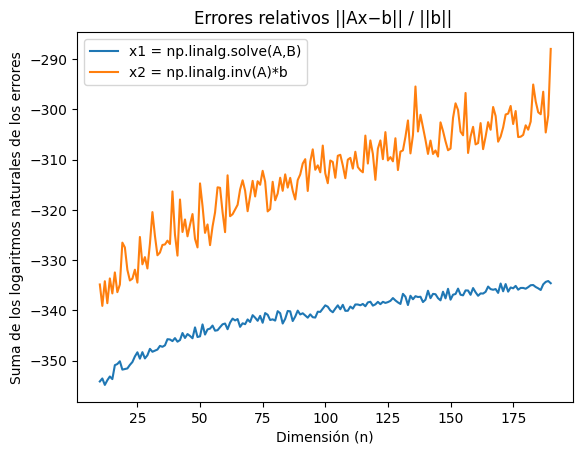

In [22]:
#Experimento 7
def ln_err_xi(A, b, xi, x):
  res = np.log(e_relativo(A,xi,b))
  return res
v1, v2 = almacenar_error()

#Grafico del experimento 7
n = np.arange(10, len(v1))
plt.plot(n, v1[10: ], label='x1 = np.linalg.solve(A,B)')
plt.plot(n, v2[10: ], label= 'x2 = np.linalg.inv(A)*b')
plt.title('Errores relativos ||Ax−b|| / ||b|| ' )
plt.legend()
plt.xlabel("Dimensión (n)")
plt.ylabel("Suma de los logaritmos naturales de los errores")
plt.show()

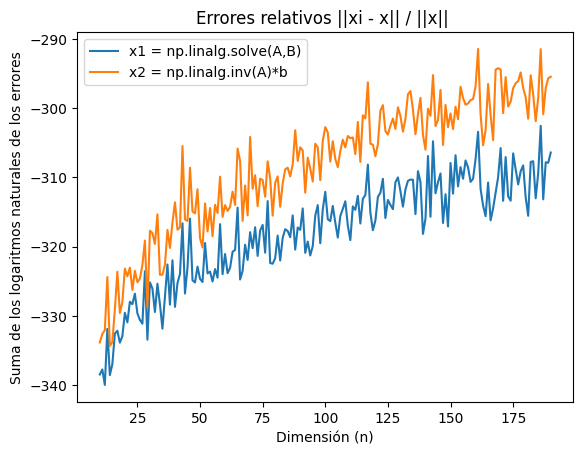

In [24]:
#Experimento 8
def ln_err_xi(A, b, xi, x):
  res = np.log(err_relativo2(xi, x))
  return res
v1, v2 = almacenar_error()

#Grafico
n = np.arange(10, len(v1))
plt.plot(n, v1[10: ], label='x1 = np.linalg.solve(A,B)')
plt.plot(n, v2[10: ], label= 'x2 = np.linalg.inv(A)*b')
plt.title('Errores relativos ||xi - x|| / ||x|| ' )
plt.xlabel("Dimensión (n)")
plt.ylabel("Suma de los logaritmos naturales de los errores")
plt.legend()
plt.show()

**Observaciones**

Para ambos gráficos podemos afirmar que la escala de valores en la que se mueven los vectores $v_1$ y $v_2$ disminuyó notablemente. Indicando que utilizando las funciones predeterminadas por la biblioteca *numpy* obtenemos menor error.

Observando ambos gráficos del *experimento 7 y 8* podemos afirmar que el método con menor error es el que calcula la solución utilizando *np.linalg.solve(A,B)*.  Tal como se veía en los gráficos anteriores con la función resolverLU(A,b).

Lo llamativo del *experimento 7* es la distancia de los errores entre ambos métodos, que parece ser mayor a la diferencia que había en el gráfico del ejercicio 7. Además el vector que contiene al método que utiliza la función *np.linalg.solve(A,B)* tiene menor cantidad de picos y se mantiene más estable a medida que aumenta la dimensión $n$ en comparación con el ejercicio 7.

En general, el patrón de que los errores aumentan a medida que aumenta la dimensión, se siguio repitiendo.

Por último, los tiempos de ejecución se redujeron en grán manera en comparación con los ejercicios anteriores.

####Ejercicio 10
Ahora repetiremos los procesos ejecutados en el ejercicio 7, pero cambiaremos la dimension de $n$ desde $2$ a $20$ y nuestra matriz $A$ pasará a ser la matriz hermitiana, en la que cada componente de $A$ esta definido de la siguiente manera: $a_{ij} = \frac{1}{i+j-1}$

In [25]:
def matriz_H(n):
    A = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            A[i-1][j-1] = 1/(i+j-1)
    return A

#Funciones auxiliares
def calcular_x1(A, b):
  res = resolverLU(A, b)
  return res

def calcular_x2(A,b):
  res = np.matmul(inversa(A), b)
  return res

def ln_err_xi(A, b, xi, x):
  res = np.log(e_relativo(A,xi,b))
  return res

*almacenar_error_2* es nuestra segunda versión de la función anterior *almacenar_error*. Como también nos interesa analizar los números de condición de las distintas matrices $A$ inicializaremos un nuevo vector $v_3$ en el que guardaremos los distintos números de condición calculados mediante el comando *np.linalg.cond(A)*.

Ahora la función devolvera 3 parámetros $v_1$, $v_2$ y $v_3$

In [26]:
def almacenar_error_2():
  v1 = np.array([])
  v2 = np.array([])
  v3 = np.array([])
  n = 2
  while n <= 20:
      suma_errores_x1 = 0
      suma_errores_x2 = 0
      for j in range(10):
        A = matriz_H(n)
        x = np.random.rand(n,1)*np.random.randint(-1,1,(n,1))
        b = np.matmul(A,x)
        #Forma 1
        x1 = calcular_x1(A, b)
        ln_err_x1 = ln_err_xi(A,b,x1, x)
        suma_errores_x1 += ln_err_x1
        #Forma 2
        x2 = calcular_x2(A,b)
        ln_err_x2 = ln_err_xi(A,b,x2, x)
        suma_errores_x2 += ln_err_x2
      v1 = np.append(v1, suma_errores_x1)
      v2 = np.append(v2, suma_errores_x2)
      v3 = np.append(v3, np.linalg.cond(A))
      n+=1
  return v1, v2, v3

v1, v2, v3 = almacenar_error_2()

<ipython-input-9-d5c2d3f60cb5>:6: RuntimeWarning: invalid value encountered in double_scalars
  e_relativo = numerador/denominador
<ipython-input-25-a01d580e3739>:18: RuntimeWarning: divide by zero encountered in log
  res = np.log(e_relativo(A,xi,b))


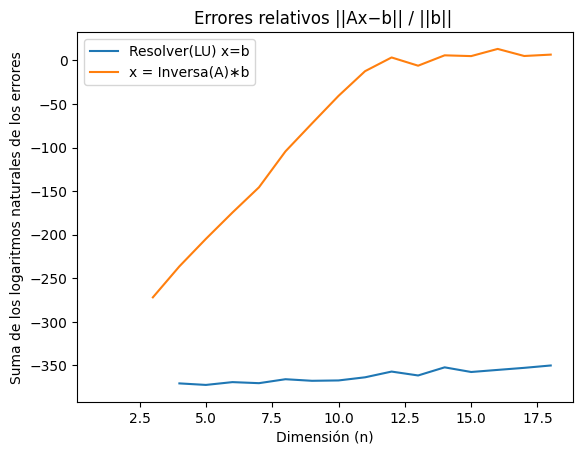

In [27]:
#Grafico comparativo de $v1 y v2
n = np.arange(0, len(v1))
plt.plot(n, v1, label='Resolver(LU) x=b')
plt.plot(n, v2, label= 'x = Inversa(A)∗b')
plt.title('Errores relativos ||Ax−b|| / ||b|| ' )
plt.xlabel("Dimensión (n)")
plt.ylabel("Suma de los logaritmos naturales de los errores")
plt.legend()
plt.show()

**Observaciones**

Para algunos $n$ el error relativo nos da valores muy cercanos a 0, por lo tanto, no se les puede aplicar el logaritmo natural, razón por la cuál no aparecen algunos datos en el gráfico anterior. Pareciera ser que esto deja de ocurrir a medida que las dimensiones de las matrices son más grandes.

Podemos observar que la suma de los logaritmos naturales de los errores del método 2 asciende de manera muy brusca, a medida que aumentan las primeras dimensiones, terminando en valores cercanos a 0. Mientras que el otro método, parece mantenerse estable y con errores más bajos.

n =  2 : 19.28147006790397 

n =  3 : 524.0567775860644 

n =  4 : 15513.73873892924 

n =  5 : 476607.2502425855 

n =  6 : 14951058.642254734 

n =  7 : 475367356.7446793 

n =  8 : 15257575538.060041 

n =  9 : 493153755941.02344 

n =  10 : 16024416987428.36 

n =  11 : 522270131654983.3 

n =  12 : 1.7515952300879806e+16 

n =  13 : 3.1883950689209334e+18 

n =  14 : 6.200786281355982e+17 

n =  15 : 3.67568286586649e+17 

n =  16 : 7.046389953630175e+17 

n =  17 : 1.249010044779401e+18 

n =  18 : 2.2477642911280653e+18 

n =  19 : 6.472700911391398e+18 

n =  20 : 1.1484020388436145e+18 



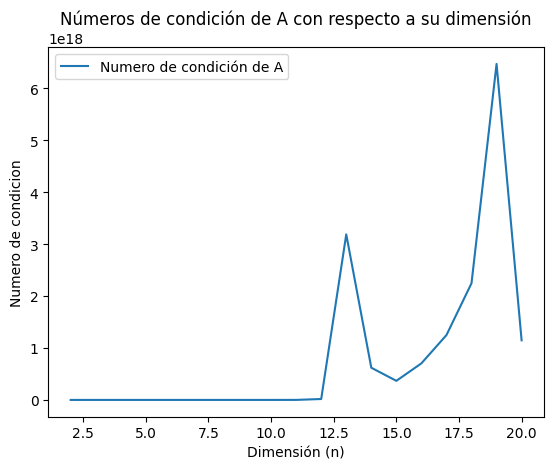

In [28]:
#Números de condicion
i= 0
for n in range(len(v3)):
  print("n = ",n+2,":", v3[i],"\n")
  i+=1

#Grafico de numeros de condición
n = np.arange(2, len(v3)+2)
plt.plot(n, v3, label='Numero de condición de A')
plt.title('Números de condición de A con respecto a su dimensión' )
plt.xlabel("Dimensión (n)")
plt.ylabel("Numero de condicion")
plt.legend()
plt.show()

**Conclusiones sobre el número de condición de $A$**

Podemos observar que el número de condición de $A$, aumenta en una escala muy grande a medida que aumenta la dimensión de $A$, alcanzando valores de un orden bastante alto.

Esto nos indica que en sistemas matriciales $Ax=b$, siendo $A$ una matriz hermitiana de dimension $n\times n$, pequeñas perturbaciones en $b$ implican mayores repercusiones en las soluciones del sistema, alejandolos cada vez más del valor original, cuando $n$ toma valores grandes en comparación con otros valores de $n$ más chicos.

También hay un aumento en el número de condición en la dimensión 13, lo cual no sabemos por que sucede.

### Conclusiones Finales

Luego de diseñar y analizar algoritmos para resolver sistemas matriciales del tipo $Ax=b$, comparamos el error relativo de dos métodos distintos para hallar $x$:
1. Hallando la descomposición LU de $A$ y resolver ecuaciones
2. Hallando la inversa de $A$ y multiplicandola por $b$

Llegamos a las siguientes conclusiones:

En primer lugar, observamos que la técnica más efectiva para hallar la solución $x$ en este tipo de sistemas es mediante la descomposición LU de la matriz $A$, seguida por la resolución de ecuaciones. Esto se logra eficientemente con nuestra función *resolverLU(A,b)*, así como con la función predeterminada *numpy.linalg.solve()* de la biblioteca NumPy.

Durante nuestros experimentos, notamos que la complejidad de los algoritmos aumenta considerablemente a medida que incrementa la dimensión del sistema matricial. Ante esta situación, concluimos que el método *numpy.linalg.solve()* es el más eficiente en términos de tiempo de ejecución y precisión en los resultados.

Finalmente, cabe resaltar que tanto el error relativo como el número de condición de la matriz crecen a medida que la dimensión del sistema matricial aumenta. Este fenómeno complica la obtención de soluciones precisas en sistemas de grandes dimensiones.